In [1]:
import pandas as pan   
import matplotlib.pyplot as plt 
import yfinance as fin 
import numpy as num 
import seaborn as sb 
  
%matplotlib inline 

In [2]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np

In [3]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, silhouette_score

In [4]:
stocks = input("Enter the code of the stock:- ") 
data = fin.download(stocks, "2021-04-01", "2022-03-31", auto_adjust=True) 
data.head()

Enter the code of the stock:- GOOGL
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2021-03-31,102.720001,104.313004,102.349998,103.125999,42570000
2021-04-01,104.612503,106.787498,104.571503,106.488998,39880000
2021-04-05,107.357498,111.449501,107.260498,110.947998,48510000
2021-04-06,110.545998,111.400002,110.089500,110.462997,35240000
2021-04-07,110.654999,112.224998,110.654999,111.951500,24134000


In [5]:
data.shape 

(253, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-03-31 to 2022-03-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    253 non-null    float64
 1   High    253 non-null    float64
 2   Low     253 non-null    float64
 3   Close   253 non-null    float64
 4   Volume  253 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.9 KB


In [7]:
data.describe()

,Open,High,Low,Close,Volume
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,133.115597,134.311503,131.754451,133.082257,3.119515e+07
std,11.481949,11.540092,11.238668,11.338311,1.354679e+07
min,102.720001,104.313004,102.349998,103.125999,1.430200e+07
25%,122.678497,123.055496,121.834503,122.508499,2.239000e+07
50%,136.101501,137.184006,134.550003,136.022995,2.749400e+07
75%,142.647507,143.834503,140.912003,142.078995,3.557600e+07
max,151.250000,151.546494,148.899002,149.838501,1.232000e+08


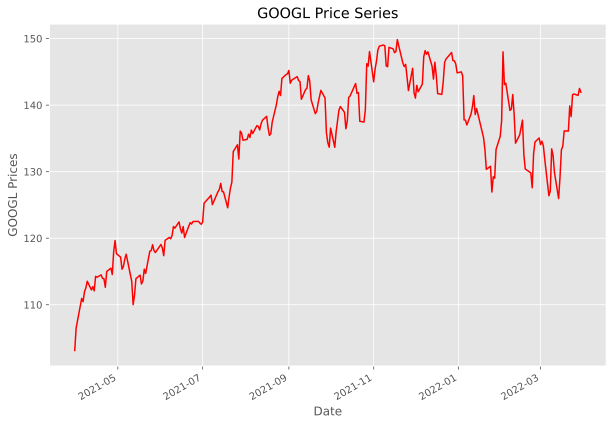

In [8]:
data.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_15976\4128163586.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data["Close"])


<AxesSubplot: xlabel='Close', ylabel='Density'>

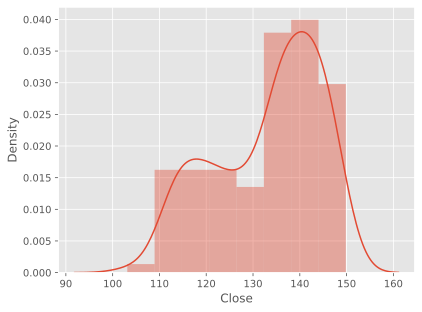

In [9]:
sb.distplot(data["Close"])

C:\Users\Hp\AppData\Local\Temp\ipykernel_15976\2725614008.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data["Open"])


<AxesSubplot: xlabel='Open', ylabel='Density'>

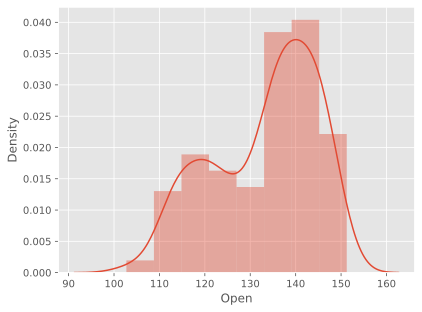

In [10]:
sb.distplot(data["Open"])

C:\Users\Hp\AppData\Local\Temp\ipykernel_15976\3861871830.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data["High"])


<AxesSubplot: xlabel='High', ylabel='Density'>

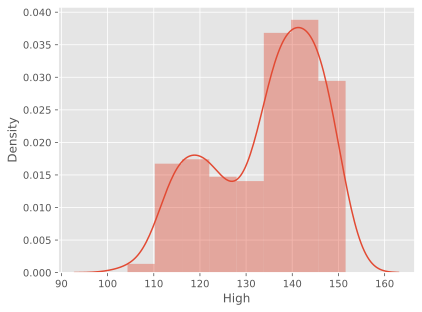

In [11]:
sb.distplot(data["High"])

In [12]:
X = data.drop("Close", axis=1) 
y = data["Close"] 

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2, random_state=0) 
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape) 

(202, 4)
(51, 4)
(202,)
(51,)


In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() 
lr.fit(X_train, y_train) 
pred1 = lr.predict(X_test)

In [14]:
# MSE -- > Mean Squared  
# RMSE ---> sart(MSE) 
# r2_square ---> 1.0 # good model 

from sklearn.metrics import mean_squared_error, r2_score 


def calculate_metrics(y_test, y_pred):  
    ''' 
    y_test:- ground truth 
    y_pred:- model predict  
    '''
    mse = mean_squared_error(y_test, y_pred) 
    rmse = num.sqrt(mse) 
    r2_scors = r2_score(y_test, y_pred) 
    
    print("MSE:- ", mse) 
    print("RMSE:- ", rmse) 
    print("R2_score:- ", r2_scors) 
    
calculate_metrics(y_test, pred1)

MSE:-  0.577663380194261
RMSE:-  0.7600416963524179
R2_score:-  0.9946836689083671


In [15]:
from sklearn.linear_model import Lasso, Ridge 

la = Lasso().fit(X_train, y_train )
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
la_p = la.predict(X_test) 
rr_p = rr.predict(X_test)

In [16]:
calculate_metrics(y_test, la_p)

MSE:-  1.0717281493001305
RMSE:-  1.0352430387595613
R2_score:-  0.9901367095833798


In [17]:
calculate_metrics(y_test, rr_p)

MSE:-  0.5776768758959114
RMSE:-  0.7600505745645558
R2_score:-  0.9946835447052053


In [18]:
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV 

svr = SVR() 


param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}   

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)    
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.148 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.202 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.008 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.078 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.027 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.148 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.202 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.008 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.078 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.027 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.148 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

[CV 3/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.052 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.004 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.044 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.015 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.027 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.052 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.004 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.044 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.001, kernel=rbf;, score=-0.015 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.001, kernel=rbf;, score=-0.027 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.001, kernel=rbf;, score=-0.052 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.001, kernel=rbf;, score=-0.004 total time=   0.0s
[CV 5/5] END ..C=1000, gamma

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [19]:
svr = SVR(C=10, gamma=0.01, kernel='rbf') 
svr.fit(X_train, y_train) 
svr_pred = svr.predict(X_test) 

In [20]:
import joblib  

joblib.dump(rr, 'model.pkl') 

ridge_from_joblib = model = joblib.load("model.pkl")

In [21]:
def preprocess(Open,High,Low,Volume):
    test_data=num.array([[Open,High,Low,Volume]])
    trained_model=joblib.load("model.pkl")
    prediction=trained_model.predict(test_data)
    return prediction
t=preprocess(97.31,100.32,97.31,27556600)
print("Predicted Value for the given stock is: ",t)

Predicted Value for the given stock is:  [99.95987806]


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [22]:
cols = ['#1FC17B', '#78FECF', '#555B6E', '#CC998D', '#429EA6',
        '#153B50', '#8367C7', '#EE6352', '#C287E8', '#F0A6CA', 
        '#521945', '#361F27', '#828489', '#9AD2CB', '#EBD494', 
        '#53599A', '#80DED9', '#EF2D56', '#446DF6', '#AF929D']

In [23]:
X,y= make_blobs(n_features=50,centers=20,n_samples=20000, cluster_std=0.2,center_box=[-1,1],random_state=17)
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.1 , random_state=17)


In [24]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [25]:
pca = PCA(n_components = 2)
pca.fit(X_train)
res_pca = pca.transform(X_test)
res_pca.shape

(2000, 2)

Text(0.5, 1.0, 'PCA Result')

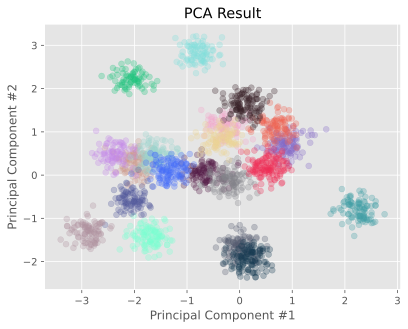

In [26]:
unique_labels = np.unique(y_test)
for index , unique_label in enumerate(unique_labels):
    X_data = res_pca[y_test == unique_label]
    plt.scatter(X_data[:,0],X_data[:,1],alpha=0.3, c=cols[index])
plt.xlabel('Principal Component #1')
plt.ylabel('Principal Component #2')
plt.title('PCA Result')

In [27]:
autoencoder = MLPRegressor(alpha = 1e-15, hidden_layer_sizes = (50,100,50,2,50,100,50),random_state=1,max_iter=20000)
autoencoder.fit(X_train,X_train)

MLPRegressor(alpha=1e-15, hidden_layer_sizes=(50, 100, 50, 2, 50, 100, 50),
             max_iter=20000, random_state=1)

In [28]:
W = autoencoder.coefs_
biases = autoencoder.intercepts_

In [29]:
for w in W:
    print(w.shape)

(50, 50)
(50, 100)
(100, 50)
(50, 2)
(2, 50)
(50, 100)
(100, 50)
(50, 50)


In [30]:
encoder_weights = W[0:4]
encoder_biases = biases[0:4]

In [31]:
def encode(encoder_weights,encoder_biases,data):
    res_ae = data
    for index , (w,b) in enumerate(zip(encoder_weights,encoder_biases)):
        if index+1 == len(encoder_weights):
            res_ae = res_ae@w+b
        else:
            res_ae = np.maximum(0,res_ae@w+b)
    return res_ae

res_ae = encode(encoder_weights,encoder_biases,X_test)

In [32]:
res_ae.shape

(2000, 2)

Text(0.5, 1.0, 'Autoencoder Results')

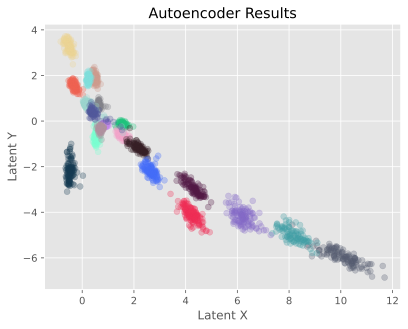

In [33]:
unique_labels=np.unique(y_test)
for index , unique_label in enumerate(unique_labels):
    latent_space = res_ae[y_test == unique_label]
    plt.scatter(latent_space[:,0],latent_space[:,1],alpha=0.3,c=cols[index])
plt.xlabel('Latent X')
plt.ylabel('Latent Y')
plt.title('Autoencoder Results')

In [34]:
silhouette_score(X_test,y_test)


0.613437853620732

In [35]:
silhouette_score(res_pca,y_test)


0.3646372499228226

In [36]:
silhouette_score(res_ae,y_test)

0.5353747055063933